In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

**Логистическая регрессия**

Признаковое пространство может быть разделено гиперплоскостью на два полупространства, в каждом из которых прогнозируется одно из двух значений целевого класса.

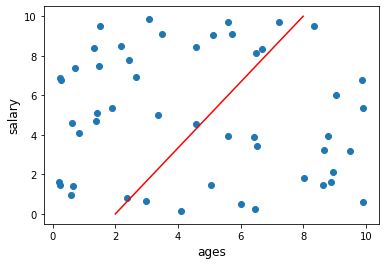

In [2]:
x = [random.random() * 10 for _ in range(50)]
y = [random.random() * 10 for _ in range(50)]
y = np.random.normal
plt.scatter(x, y, marker='o')
plt.xlabel('ages', fontsize=12)
plt.ylabel('salary', fontsize=12)
plt.plot([2, 8], [0, 10], color = 'red')
plt.show()

Логистическая регрессия - метод машинного обучения, использующий логистическую функцию потерь для оптимизации
$$log-loss = \sum_{i=1}^n log(1+exp^{-y_i<\vec{w_i}^T,\vec{x_i}>})\longrightarrow min$$
Логистическая регрессия - бинарная задача классификации, то есть определения отношения объекта к тому или иному классу
Имеем входные данные $\vec{x}=(1, x_1, x_2, ... , x_n)$ и набор весов $\vec{w}=(w_0, w_1, ... , w_n)$. Они образуют линейную комбинацию $<\vec{w}^T, \vec{x}>\in R$. Задача стоит в том, чтобы на выходе получить вероятность $P_+\in [0, 1]$ отнесения к классу "+". Для этого можем рассмотреть шансы $odds=\frac{P_+}{P_-}$ — отношение вероятностей того, произойдет ли событие или не произойдет. Очевидно, что вероятность и отношение шансов содержат одинаковую информацию. Но в то время как $P_+\in[0,1]$, отношение находится в пределах от $0$ до $\infty$. Если вычислим логарифм отношений, то замети что $log-odds=log\frac{P_+}{P_-}\in R$. Его и будем прогназировать.
$$log-odds=log\frac{P_+}{P_-}=<\vec{w}^T, \vec{x}> \in R$$
Зная, что $P_+=1-P_-$, выразим чему равно $P_+$:
$$P_+=\frac{1}{1+exp^{-<\vec{w}^T,\vec{x}>}}=\sigma(<\vec{w}^T,\vec{x_i}>)$$
Полученная функция называется сигмоидой.

In [3]:
def logistic(z):
    # функция сигмоиды
    return 1 / (1 + np.exp(-z))

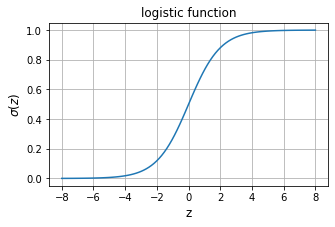

In [6]:
# строим график сигмоиды
z = np.linspace(-8, 8, 100)
fig = plt.figure(figsize=(5,3))
plt.plot(z, logistic(z))
plt.xlabel('z', fontsize=12)
plt.ylabel('$\sigma(z)$', fontsize=12)
plt.title('logistic function')
plt.grid()
plt.show()

Итак, логистическая регрессия прогнозирует вероятность отнесения примера к классу "+" (при условии, что мы знаем его признаки и веса модели) как сигмоид-преобразование линейной комбинации вектора весов модели и вектора признаков примера:
$$P(y_i=1|\vec{x_i},\vec{w})=\sigma(<\vec{w}^T,\vec{x_i}>)$$

**Логистическая функция потерь**

Если алгоритм $b(x)\in [0,1]$ действительно выдает вероятности, то они должны согласовываться с выборкой. С точки зрения алгоритма вероятность того, что в выборке встретится объект $x_i$ с классом $y_i$, равна $b(x_i)^{y_i}(1-b(x_i))^{1-y_i}$. Исходя из этого можно записать правдоподобие выборки (т.е. вероятность получить такую выборку с точки зрения алгоритма):
$$P(\vec{y} | X)=\prod_{i=1}^lb(x_i)^{y_i}(1-b(x_i))^{1-y_i}$$
Данное правдоподобие можно использовать как функционал для обучения алгоритма - с той лишь оговоркой, что удобнее оптимизировать его логафирм:
$$$$

Логическая регрессия моделирует вероятность отнесения объекта к классу "+" как
$$P(y_i=1|\vec{x_i},\vec{w})=\sigma(<\vec{w}^T,\vec{x_i}>)$$
Тогда для класса "-" аналогичная вероятность:
$$P(y_i=-1|\vec{x_i},\vec{w})=1-\sigma(<\vec{w}^T,\vec{x_i}>)=\sigma(<-\vec{w}^T,\vec{x_i}>)$$
Оба этих выражения можно объеденить в одно
$$P(y=y_i|\vec{x_i},\vec{w})=\sigma(y_i<\vec{w}^T,\vec{x_i}>)$$
Распишем правдоподобие выборки, а именно, вероятность наблюдать данный вектор $\vec{y}$ у выборки $X$
$$P(\vec{y}|X,\vec{w})=\prod_{i=1}^lP(y=y_i|\vec{x_i},\vec{w})$$
где l - длина выборки $X$ (число строк)
Возьмем логарифм данного выражения (сумму намного проще оптимизировать, чем произведение):
$$logP(\vec{y}|X,\vec{w})=log\prod_{i=1}^lP(y=y_i|\vec{x_i},\vec{w})=\sum_{i=1}^llog\sigma(<y_i\vec{w}^T,\vec{x_i}>)=\sum_{i=1}^llog\frac{1}{1+exp^{-y_i<\vec{w}^T,\vec{x_i}>}}=-\sum_{i=1}^llog(1+exp^{-y_i<\vec{w}^T,\vec{x_i}>})$$
Задача сводится к минимизации выражения:
$$log-loss = \sum_{i=1}^n log(1+exp^{-y_i<\vec{w_i}^T,\vec{x_i}>})$$